In [36]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import numpy as np
import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [124]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        sel = np.where((x>x_low)&(x<x_high))
        print("%.2f - %.2f"%(x_low, x_high)," : ",len(sel[0]))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    print('---')
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [38]:
def mean_in_bins_err(x,y,x1,x2,nbins):
    mean_x = np.zeros(nbins)
    mean_y = np.zeros(nbins)
    #err_y_low = np.zeros(nbins)
    #err_y_high = np.zeros(nbins)
    err_y = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        sel = np.where((x>x_low)&(x<x_high))
        mean_y[i] = np.mean(y[sel])
        err_y[i] = np.std(y[sel])
        mean_x[i] = np.mean(x[sel])
    return np.array(mean_x),np.array(mean_y),err_y

In [39]:
T = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99)#,

36.5 37.6  :  35
37.6 38.7  :  150
38.7 39.8  :  223
39.8 40.9  :  252
40.9 42.0  :  104
---
36.5 37.6  :  17
37.6 38.7  :  75
38.7 39.8  :  109
39.8 40.9  :  124
40.9 42.0  :  51
---
36.5 37.6  :  18
37.6 38.7  :  75
38.7 39.8  :  114
39.8 40.9  :  128
40.9 42.0  :  53
---


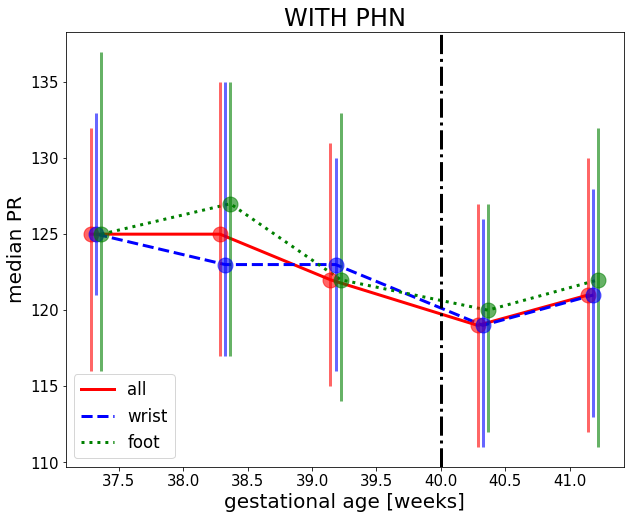

In [49]:
### WITH PHN ###

plt.figure(figsize=(10,8))
x = np.array(T['GEST_AGE_DAYS'])/7.
y = np.array(T['MED_PR'])

w_sel = np.where(T['WRIST']==True)
f_sel = np.where(T['FOOT']==True)


#plt.plot(T['GEST_AGE_DAYS']/7.,T['MED_PR'],".")

xx,yy,ey1,ey2 = median_in_bins_err(x,y,36.5,42,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,alpha=0.6)
plt.plot(xx,yy,color="red",lw=3,label ='all')

xx,yy,ey1,ey2 = median_in_bins_err(x[w_sel],y[w_sel],36.5,42,5)
plt.errorbar(xx+0.04,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,alpha=0.6)
plt.plot(xx+0.04,yy,color="blue",lw=3,ls='dashed',label ='wrist')

xx,yy,ey1,ey2 = median_in_bins_err(x[f_sel],y[f_sel],36.5,42,5)
plt.errorbar(xx+0.08,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,alpha=0.6)
plt.plot(xx+0.08,yy,color="green",lw=3,ls='dotted',label ='foot')

plt.axvline(40,ls='-.',color='k',lw=3)

plt.xlabel('gestational age [weeks]')
plt.ylabel('median PR')
plt.title('WITH PHN')

plt.legend(fontsize='small',loc=3)
plt.savefig('../plots/019/PR_gest_age_with_phn.jpeg')
plt.show()

## NO PHN -- gestational age

36.5 37.6  :  31
37.6 38.7  :  119
38.7 39.8  :  163
39.8 40.9  :  177
40.9 42.0  :  82
---
36.5 37.6  :  15
37.6 38.7  :  59
38.7 39.8  :  79
39.8 40.9  :  86
40.9 42.0  :  40
---
36.5 37.6  :  16
37.6 38.7  :  60
38.7 39.8  :  84
39.8 40.9  :  91
40.9 42.0  :  42
---


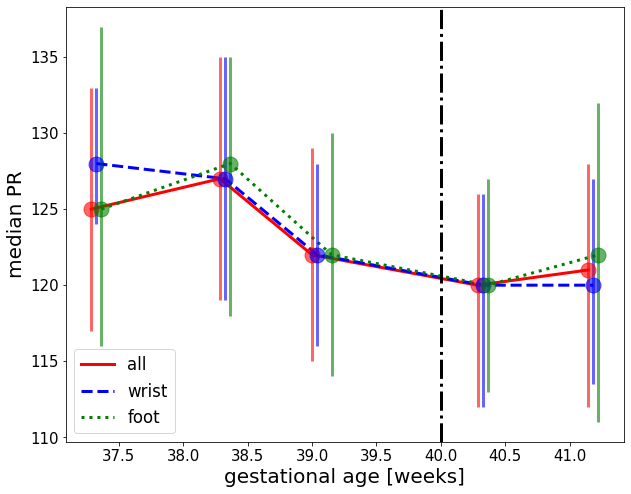

In [50]:
##########
# NO PHN #
##########

plt.figure(figsize=(10,8))
x = np.array(T['GEST_AGE_DAYS'])/7.
y = np.array(T['MED_PR'])

a_sel = np.where(T['PHN']==False)
w_sel = np.where((T['WRIST']==True)&(T['PHN']==False))
f_sel = np.where((T['FOOT']==True )&(T['PHN']==False))


#plt.plot(T['GEST_AGE_DAYS']/7.,T['MED_PR'],".")

xx,yy,ey1,ey2 = median_in_bins_err(x[a_sel],y[a_sel],36.5,42,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,alpha=0.6)
plt.plot(xx,yy,color="red",lw=3,label ='all')

xx,yy,ey1,ey2 = median_in_bins_err(x[w_sel],y[w_sel],36.5,42,5)
plt.errorbar(xx+0.04,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,alpha=0.6)
plt.plot(xx+0.04,yy,color="blue",lw=3,ls='dashed',label ='wrist')

xx,yy,ey1,ey2 = median_in_bins_err(x[f_sel],y[f_sel],36.5,42,5)
plt.errorbar(xx+0.08,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,alpha=0.6)
plt.plot(xx+0.08,yy,color="green",lw=3,ls='dotted',label ='foot')

plt.axvline(40,ls='-.',color='k',lw=3)

plt.xlabel('gestational age [weeks]')
plt.ylabel('median PR')

plt.legend(fontsize='small',loc=3)
plt.savefig('../plots/019/PR_gest_age_no_phn.jpeg')
plt.show()

In [51]:
len(a_sel[0]),len(f_sel[0]),len(w_sel[0])

(572, 293, 279)

In [53]:
a = T['MED_PR'][(T['GEST_AGE_DAYS']/7.<40) & (T['WRIST']==True) & (T['PHN']==False)]
b = T['MED_PR'][(T['GEST_AGE_DAYS']/7.>=40) & (T['WRIST']==True) & (T['PHN']==False)]

### WRIST ###
ga < 40:  # = 160, median = 123 , iqr = [116,132], mean = 123.98, std = 10.55
ga >= 40: # = 119, median = 120 , iqr = [113,126], mean = 119.51, std = 10.49
p-value(TT) = 0.00055
p-value(MW) = 0.00032
difference between means = 4.47
Confidence interval 95 perc = 2.49 ==> [3.23,5.72]


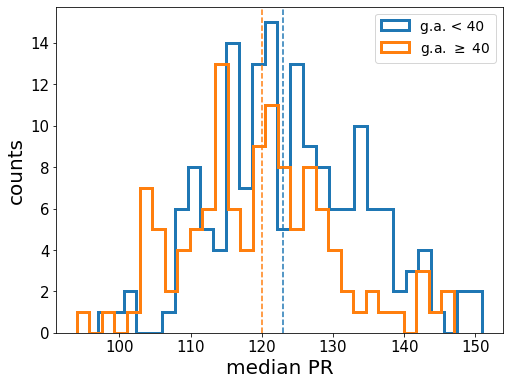

In [130]:
######## WRIST #########

var1 = T['MED_PR'][(T['GEST_AGE_DAYS']/7.<40) & (T['WRIST']==True) & (T['PHN']==False)]
var2 = T['MED_PR'][(T['GEST_AGE_DAYS']/7.>=40) & (T['WRIST']==True) & (T['PHN']==False)]

n1 = len(var1)
n2 = len(var2)


m1 = np.median(var1)
M1 = np.mean(var1)
m2 = np.median(var2)
M2 = np.mean(var2)

s1 = ss.iqr(var1)
S1 = np.std(var1)
s2 = ss.iqr(var2)
S2 = np.std(var2)

p1 = np.percentile(var1,q=25)
pp1 = np.percentile(var1,q=75)

p2 = np.percentile(var2,q=25)
pp2 = np.percentile(var2,q=75)

CI95 = 1.96*np.sqrt((S1**2/n1)+(S2**2/n2))

plt.figure(figsize=(8,6))
#plt.hist(var1,bins=30,histtype='step',lw=3,label='wrist (med = %.0f $\pm$ %.0f)'%(m1,s1),color='C0')
#plt.hist(var2,bins=30,histtype='step',lw=3,label='foot (med = %.0f $\pm$ %.0f)'%(m2,s2),color='C1')

plt.hist(var1,bins=30,histtype='step',lw=3,label='g.a. < 40',color='C0')
plt.hist(var2,bins=30,histtype='step',lw=3,label='g.a. $\geq$ 40',color='C1')


plt.axvline(m1,ls='--',color='C0')
plt.axvline(m2,ls='--',color='C1')
plt.xlabel('median PR')
plt.ylabel('counts')
p_val_tt = ss.ttest_ind(var1,var2)[1]
p_val_mw = ss.mannwhitneyu(var1,var2)[1]
print('### WRIST ###')
print('ga < 40:  # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(n1,m1,p1,pp1,M1,S1))
print('ga >= 40: # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(n2,m2,p2,pp2,M2,S2))
print('p-value(TT) = %.5f'%p_val_tt)
print('p-value(MW) = %.5f'%p_val_mw)
diff = (np.abs(M1-M2))
print('difference between means = %.2f'%diff)
print('Confidence interval 95 perc = %.2f ==> [%.2f,%.2f]'%(CI95,(diff - CI95/2.),(diff + CI95/2.)))


#plt.title('All measurements (excluding PHN)')
plt.legend(fontsize='x-small')
plt.savefig('../plots/019/histo_gestational_age_wrist.jpeg')
plt.show()

### FOOT ###
ga < 40:  # = 169, median = 123 , iqr = [116,133], mean = 124.39, std = 13.23
ga >= 40: # = 124, median = 120 , iqr = [112,128], mean = 120.42, std = 11.96
p-value(TT) = 0.00883
p-value(MW) = 0.00596
difference between means = 3.98
Confidence interval 95 perc = 2.90 ==> [2.53,5.43]


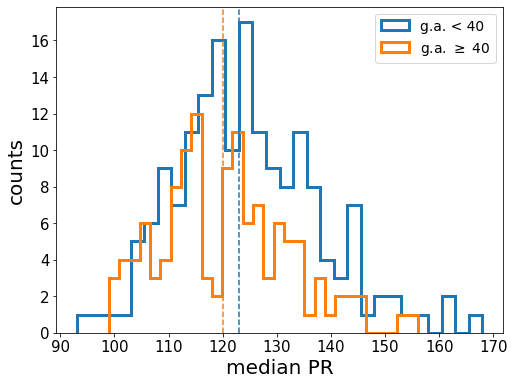

In [132]:
###### FOOT #######

var1 = T['MED_PR'][(T['GEST_AGE_DAYS']/7.<40) & (T['FOOT']==True) & (T['PHN']==False)]
var2 = T['MED_PR'][(T['GEST_AGE_DAYS']/7.>=40) & (T['FOOT']==True) & (T['PHN']==False)]

n1 = len(var1)
n2 = len(var2)


m1 = np.median(var1)
M1 = np.mean(var1)
m2 = np.median(var2)
M2 = np.mean(var2)

s1 = ss.iqr(var1)
S1 = np.std(var1)
s2 = ss.iqr(var2)
S2 = np.std(var2)

p1 = np.percentile(var1,q=25)
pp1 = np.percentile(var1,q=75)

p2 = np.percentile(var2,q=25)
pp2 = np.percentile(var2,q=75)

CI95 = 1.96*np.sqrt((S1**2/n1)+(S2**2/n2))

plt.figure(figsize=(8,6))
#plt.hist(var1,bins=30,histtype='step',lw=3,label='wrist (med = %.0f $\pm$ %.0f)'%(m1,s1),color='C0')
#plt.hist(var2,bins=30,histtype='step',lw=3,label='foot (med = %.0f $\pm$ %.0f)'%(m2,s2),color='C1')

plt.hist(var1,bins=30,histtype='step',lw=3,label='g.a. < 40' ,color='C0')
plt.hist(var2,bins=30,histtype='step',lw=3,label='g.a. $\geq$ 40',color='C1')


plt.axvline(m1,ls='--',color='C0')
plt.axvline(m2,ls='--',color='C1')
plt.xlabel('median PR')
plt.ylabel('counts')
p_val_tt = ss.ttest_ind(var1,var2)[1]
p_val_mw = ss.mannwhitneyu(var1,var2)[1]
print('### FOOT ###')
print('ga < 40:  # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(len(var1),m1,p1,pp1,M1,S1))
print('ga >= 40: # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(len(var2),m2,p2,pp2,M2,S2))
print('p-value(TT) = %.5f'%p_val_tt)
print('p-value(MW) = %.5f'%p_val_mw)
diff = (np.abs(M1-M2))
print('difference between means = %.2f'%diff)
print('Confidence interval 95 perc = %.2f ==> [%.2f,%.2f]'%(CI95,(diff - CI95/2.),(diff + CI95/2.)))

#plt.title('All measurements (excluding PHN)')
plt.legend(fontsize='x-small')
plt.savefig('../plots/019/histo_gestational_age_foot.jpeg')
plt.show()

In [80]:
number = 1.923456789
print('integer = %i'%number)
print('float = %.0f'%number)

integer = 1
float = 2


In [ ]:
### report confidence interval

### I can create a function to plot two distribution and report all the information in a file txt

## No PHN PR vs time

6.00 - 14.10  :  203
14.10 - 22.20  :  234
22.20 - 30.30  :  63
30.30 - 38.40  :  27
38.40 - 46.50  :  31
---
6.00 - 14.10  :  101
14.10 - 22.20  :  113
22.20 - 30.30  :  30
30.30 - 38.40  :  13
38.40 - 46.50  :  16
---
6.00 - 14.10  :  102
14.10 - 22.20  :  121
22.20 - 30.30  :  33
30.30 - 38.40  :  14
38.40 - 46.50  :  15
---


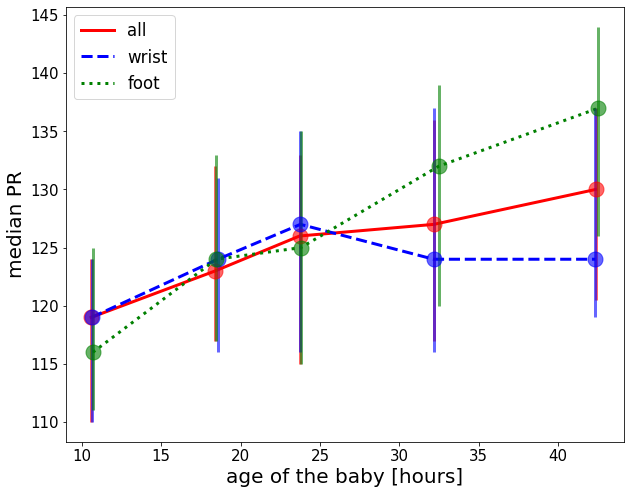

In [125]:
##########
# NO PHN #
##########

plt.figure(figsize=(10,8))
#x = np.array(T['GEST_AGE_DAYS'])/7.
x = np.array(T['DELTA_SEC_MEASURE'])/60./60.
y = np.array(T['MED_PR'])

a_sel = np.where(T['PHN']==False)
w_sel = np.where((T['WRIST']==True)&(T['PHN']==False))
f_sel = np.where((T['FOOT']==True )&(T['PHN']==False))

#plt.plot(x,y,".")


#plt.plot(T['GEST_AGE_DAYS']/7.,T['MED_PR'],".")

xx,yy,ey1,ey2 = median_in_bins_err(x[a_sel],y[a_sel],6.,46.5,5)
#xx,yy,ey1,ey2 = median_in_bins_err(x[a_sel],y[a_sel],6.,60,5)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',zorder=11,alpha=0.6)
plt.plot(xx,yy,color="red",lw=3,label ='all')

xx,yy,ey1,ey2 = median_in_bins_err(x[w_sel],y[w_sel],6.,46.5,5)
plt.errorbar(xx+0.04,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='blue',zorder=11,alpha=0.6)
plt.plot(xx+0.04,yy,color="blue",lw=3,ls='dashed',label ='wrist')

xx,yy,ey1,ey2 = median_in_bins_err(x[f_sel],y[f_sel],6.,46.5,5)
plt.errorbar(xx+0.08,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='green',zorder=11,alpha=0.6)
plt.plot(xx+0.08,yy,color="green",lw=3,ls='dotted',label ='foot')

#plt.axvline(40,ls='-.',color='k',lw=3)

plt.xlabel('age of the baby [hours]')
plt.ylabel('median PR')

plt.legend(fontsize='small',loc=2)
plt.savefig('../plots/019/PR_time_no_phn.jpeg')
plt.show()

### WRIST ###
age < 12 hours:  # = 76, median = 119 , iqr = [110,123], mean = 118.47, std = 10.76
12h < age < 24h: # = 157, median = 122 , iqr = [115,129], mean = 122.73, std = 10.08
p-value(TT) = 0.00359
p-value(MW) = 0.00188
difference between means = 4.26
Confidence interval 95 perc = 2.89 ==> [2.81,5.70]


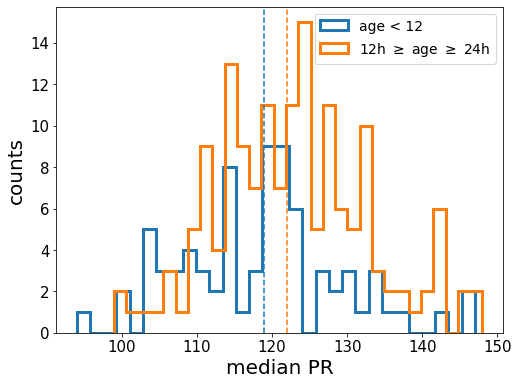

In [136]:
######## WRIST #########

var1 = T['MED_PR'][(T['DELTA_SEC_MEASURE']/60./60.<12) & (T['WRIST']==True) & (T['PHN']==False)]
var2 = T['MED_PR'][(T['DELTA_SEC_MEASURE']/60./60.>=12) & (T['DELTA_SEC_MEASURE']/60./60.<=24) & (T['WRIST']==True) & (T['PHN']==False)]

n1 = len(var1)
n2 = len(var2)


m1 = np.median(var1)
M1 = np.mean(var1)
m2 = np.median(var2)
M2 = np.mean(var2)

s1 = ss.iqr(var1)
S1 = np.std(var1)
s2 = ss.iqr(var2)
S2 = np.std(var2)

p1 = np.percentile(var1,q=25)
pp1 = np.percentile(var1,q=75)

p2 = np.percentile(var2,q=25)
pp2 = np.percentile(var2,q=75)

CI95 = 1.96*np.sqrt((S1**2/n1)+(S2**2/n2))

plt.figure(figsize=(8,6))
#plt.hist(var1,bins=30,histtype='step',lw=3,label='wrist (med = %.0f $\pm$ %.0f)'%(m1,s1),color='C0')
#plt.hist(var2,bins=30,histtype='step',lw=3,label='foot (med = %.0f $\pm$ %.0f)'%(m2,s2),color='C1')

plt.hist(var1,bins=30,histtype='step',lw=3,label='age < 12',color='C0')
plt.hist(var2,bins=30,histtype='step',lw=3,label='12h $\geq$ age $\geq$ 24h',color='C1')


plt.axvline(m1,ls='--',color='C0')
plt.axvline(m2,ls='--',color='C1')
plt.xlabel('median PR')
plt.ylabel('counts')
p_val_tt = ss.ttest_ind(var1,var2)[1]
p_val_mw = ss.mannwhitneyu(var1,var2)[1]
print('### WRIST ###')
print('age < 12 hours:  # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(n1,m1,p1,pp1,M1,S1))
print('12h < age < 24h: # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(n2,m2,p2,pp2,M2,S2))
print('p-value(TT) = %.5f'%p_val_tt)
print('p-value(MW) = %.5f'%p_val_mw)
diff = (np.abs(M1-M2))
print('difference between means = %.2f'%diff)
print('Confidence interval 95 perc = %.2f ==> [%.2f,%.2f]'%(CI95,(diff - CI95/2.),(diff + CI95/2.)))


#plt.title('All measurements (excluding PHN)')
plt.legend(fontsize='x-small')
plt.savefig('../plots/019/histo_time_wrist.jpeg')
plt.show()

### FOOT ###
age < 12 hours:  # = 75, median = 116 , iqr = [111,126], mean = 119.29, std = 12.43
12h < age < 24h: # = 170, median = 122 , iqr = [114,129], mean = 122.51, std = 11.81
p-value(TT) = 0.05453
p-value(MW) = 0.00926
difference between means = 3.23
Confidence interval 95 perc = 3.33 ==> [1.56,4.89]


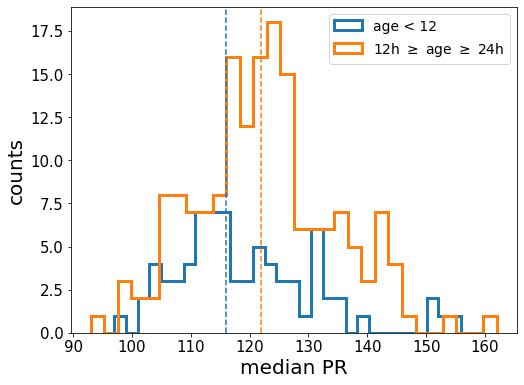

In [137]:
######## FOOT #########

var1 = T['MED_PR'][(T['DELTA_SEC_MEASURE']/60./60.<12) & (T['FOOT']==True) & (T['PHN']==False)]
var2 = T['MED_PR'][(T['DELTA_SEC_MEASURE']/60./60.>=12) & (T['DELTA_SEC_MEASURE']/60./60.<=24) & (T['FOOT']==True) & (T['PHN']==False)]

n1 = len(var1)
n2 = len(var2)


m1 = np.median(var1)
M1 = np.mean(var1)
m2 = np.median(var2)
M2 = np.mean(var2)

s1 = ss.iqr(var1)
S1 = np.std(var1)
s2 = ss.iqr(var2)
S2 = np.std(var2)

p1 = np.percentile(var1,q=25)
pp1 = np.percentile(var1,q=75)

p2 = np.percentile(var2,q=25)
pp2 = np.percentile(var2,q=75)

CI95 = 1.96*np.sqrt((S1**2/n1)+(S2**2/n2))

plt.figure(figsize=(8,6))
#plt.hist(var1,bins=30,histtype='step',lw=3,label='wrist (med = %.0f $\pm$ %.0f)'%(m1,s1),color='C0')
#plt.hist(var2,bins=30,histtype='step',lw=3,label='foot (med = %.0f $\pm$ %.0f)'%(m2,s2),color='C1')

plt.hist(var1,bins=30,histtype='step',lw=3,label='age < 12',color='C0')
plt.hist(var2,bins=30,histtype='step',lw=3,label='12h $\geq$ age $\geq$ 24h',color='C1')


plt.axvline(m1,ls='--',color='C0')
plt.axvline(m2,ls='--',color='C1')
plt.xlabel('median PR')
plt.ylabel('counts')
p_val_tt = ss.ttest_ind(var1,var2)[1]
p_val_mw = ss.mannwhitneyu(var1,var2)[1]
print('### FOOT ###')
print('age < 12 hours:  # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(n1,m1,p1,pp1,M1,S1))
print('12h < age < 24h: # = %i, median = %.0f , iqr = [%.0f,%.0f], mean = %.2f, std = %.2f'%(n2,m2,p2,pp2,M2,S2))
print('p-value(TT) = %.5f'%p_val_tt)
print('p-value(MW) = %.5f'%p_val_mw)
diff = (np.abs(M1-M2))
print('difference between means = %.2f'%diff)
print('Confidence interval 95 perc = %.2f ==> [%.2f,%.2f]'%(CI95,(diff - CI95/2.),(diff + CI95/2.)))


#plt.title('All measurements (excluding PHN)')
plt.legend(fontsize='x-small')
plt.savefig('../plots/019/histo_time_foot.jpeg')
plt.show()

In [45]:
NOLABEL = np.where((T['WRIST']==False)&(T['FOOT']==False))[0]

In [46]:
T['BABY_IDS'][NOLABEL].unique()

array([], dtype=object)

In [13]:
T.columns.values

array(['BABY_IDS', 'GENDER', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS', 'DELIVERY',
       'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2', 'MED_PR',
       'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2', 'STD_PR',
       'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR', 'BRADY_RATIO_PR',
       'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20', 'BRADY_RATIO_PR_m30',
       'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2', 'BRADY_RATIO_SPO2',
       'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN', 'BRADY_NUM_PER_HOUR_PR',
       'BRADY_NUM_PER_HOUR_PR_m10', 'BRADY_NUM_PER_HOUR_PR_m20',
       'BRADY_NUM_PER_HOUR_PR_m30', 'BRADY_NUM_PER_HOUR_PR_m40',
       'BRADY_NUM_PER_HOUR_PR_dyn', 'BRADY_NUM_PER_HOUR_PR_anytime',
       'BRADY_NUM_PER_HOUR_PR_m10_anytime',
       'BRADY_NUM_PER_HOUR_PR_m20_anytime',
       'BRADY_NUM_PER_HOUR_PR_m30_anytime',
       'BRADY_NUM_PER_HOUR_PR_m40_anytime',
       'BRADY_NUM_PER_HOUR_PR_dyn_anytime', 'BRADY_DURATION_MEDIAN_PR',
       'BRADY_DURATION_MEDIAN_PR_m10', 'BRAD